# Seminar 1

## Let's get to know each other

## Counting

### Problem 1
How many Russian-style car plates are possible in one region?

### Solution

Russain car plate consists of three letters and three digits. Any digits are permitted, but the only permitted letters are the ones that have English-lookalikes. How many letters are there?

A, B, C, E, H, K, M, O, P, T, X, Y - total 12 letters.

We choose the digits and the letters. Using sampling with replacement (why?):
- We choose three of ten digits: $10^3$
- We choose three of twelve letters: $12^3$

Since the choice of the digits and the letters is independent, the total number of plates is therefore $10^3 \cdot 12^3 = 1728000$.

### Problem 2
How many 7-digit phone numbers are possible, assuming that the first digit can’t be a 0 or a 1?

### Solution

We independently choose each digit. Using sampling with replacement (why?):
- We choose the first digit from reduced set of 8 digits: $8$
- We choose the rest 6 digits: $10^6$

The total number of phone numbers is therefore $8 \cdot 10^6$.

### Problem 3
How many paths are there from the point (0,0) to the point (110,111) in the plane such that each step either consists of going one unit up or one unit to the right?

### Solution

We will encode a path as a sequence of letters $U$ (for up step) and $R$ (for right step), like $URURURU\ldots UURUR$.

The sequence must consist of 110 $R$s and 111 $U$s (why?)

We will use the factorial rule: the number of shuffles of this sequence is $(110+111)! = 221!$. Is it correct?

It is not correct, because we do not care about individual permutations of $R$s and $U$s, but we counted these permutations as different. We need to adjust for overcounting.

We need to get rid of permutations that we counted multiple times. In order to do that, we divide byy the number of such permutations, and this gives the correct answer:

$$\frac{221!}{110!111!}$$

### Binomial coefficient
A binomial coefficient counts the number of subsets of a certain size for a set, such as the number of ways to choose a committee of size $k$ from a set of $n$ people. Sets and subsets are by definition unordered, e.g., $\{3, 1, 4\} = \{4, 1, 3\}$, so we are counting the number of ways to choose $k$ objects out of $n$, without replacement and without distinguishing between the different orders in which they could be chosen.

For any nonnegative integers $k$ and $n$, the binomial coefficient $\begin{pmatrix}n\\k\end{pmatrix}$, read as "$n$ choose $k$", is the number of subsets of size $k$ for a set of size $n$. For $ k \leqslant n$,

$$
\begin{pmatrix}n\\k\end{pmatrix}=\frac{n!}{k!(n-k)!}
$$

Note that to fully describe the sequence we actually only need to specify where the $R$s are located. This falls under binomial coefficient definition. So there are $\begin{pmatrix}110+111\\110\end{pmatrix}$ possible paths.

### Problem 3
How many ways are there to split a dozen people into 3 teams, where each team has 4 people?

### Solution

Let's randomly pick the first team, then randomly pick the second and claim the remaining people the third team.

This gives us $\begin{pmatrix}12\\4\end{pmatrix}\cdot\begin{pmatrix}8\\4\end{pmatrix}$ possibilities. Is it correct?

It is not correct, because we overcounted due the fact that we do not actually care which team is the first, second or third. So we need to divide the expression by $3!$. The final answer is:

$$
\frac{1}{3!} \cdot \begin{pmatrix}12\\4\end{pmatrix}\cdot\begin{pmatrix}8\\4\end{pmatrix} = \frac{1}{3!} \cdot \frac{12!}{4!8!} \cdot \frac{8!}{4!4!} = \frac{12!}{4! 4! 4! 3!}
$$

If we cared which team is which, we would obtain $\frac{12!}{4! 4! 4!}$, which is called a multinomial coefficient. The only difference is that we choose more than one subset from one total.

### Problem 5
A certain casino uses 10 standard decks of cards mixed together into one big deck, which we will call a superdeck. Thus, the superdeck has 52 · 10 = 520 cards, with 10 copies of each card. How many different 10-card hands can be dealt from the superdeck? The order of the cards does not matter, nor does it matter which of the original 10 decks the cards came from. Express your answer as a binomial coefficient.

### Solution

Since we have 10 copies of each card, there are in fact no limitations on the hand and sampling from superdeck without replacement is equivalent to sampling from deck with replacement. So we just use the formula for sampling with replacement where the order matters:
$$
\begin{pmatrix}52+10-1\\10\end{pmatrix}
$$

## Naive definition

### Problem 7
A city with 6 districts has 6 robberies in a particular week. Assume the robberies are located randomly, with all possibilities for which robbery occurred where equally likely. What is the probability that some district had more than 1 robbery?

### Solution

We will compute the probability of the complement.

- All cases: There are $6^6$ possible configurations for which robbery occurred where.
- Favorable cases: There are $6!$ configurations where each district had exactly 1 of the 6.

So the probability of the complement of the desired event is $6!/6^6$.

Finally, the probability of some district having more than 1 robbery is $1 - 6!/6^6$.

In [1]:
from scipy.special import factorial
1 - factorial(6) / (6 ** 6)

0.9845679012345679

### Problem 8
Each of $n$ balls is independently placed into one of $n$ boxes, with all boxes equally likely.
What is the probability that exactly one box is empty?

### Solution

Reformulate: one box empty means one box has two balls.

- All cases: $n^n$ (why?)
- Favorable cases:
    - Choose empty box: $\begin{pmatrix}n\\1\end{pmatrix}$
    - Choose box with two balls: $\begin{pmatrix}n-1\\1\end{pmatrix}$
    - Choose two balls: $\begin{pmatrix}n\\2\end{pmatrix}$
    - Permutations of the rest balls: $(n-2)!$
    
Overall:
$$
\frac{\begin{pmatrix}n\\1\end{pmatrix}\begin{pmatrix}n-1\\1\end{pmatrix}\begin{pmatrix}n\\2\end{pmatrix}(n-2)!}{n^n} = \frac{\begin{pmatrix}n\\2\end{pmatrix} n!}{n^n}
$$

## Non-naive definition

### Definition

A probability space consists of a sample space $S$ and a probability function $P$ which takes an event $A \subseteq S$ as input and returns $P(A)$, a real number between $0$ and $1$, as output. The function $P$ must satisfy the following axioms:
- $P(\varnothing) = 0, P(S) = 1$
- If $A1, A2, \ldots$ are disjoint ($A_i \cap A_j = \varnothing, i \neq j$) events, then
    $$
    P\left(\bigcup\limits_{j=1}^\infty A_j\right) = \sum\limits_{j=1}^\infty P(A_j)
    $$

### Properties

1. $P(A^c) = 1 − P(A)$
2. If $A \subseteq B$, then $P(A) \leqslant P(B)$
3. $P (A \cup B) = P (A) + P (B) − P (A \cap B)$

### Inclusion-exclusion formula

$$P (A \cup B) = P (A) + P (B) − P (A \cap B)$$

$$P\left(\bigcup\limits_{i=1}^n A_i\right) = \sum_i P(A_i) − \sum_{i < j} P(A_i \cap A_j) + \sum_{i < j < k}P(A_i \cap A_j \cap A_k)−\ldots+(−1)^{n+1} P(A_1 \cap\ldots \cap A_n)$$

In [4]:
from matplotlib_venn import venn2, venn3

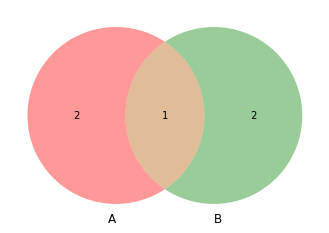

In [3]:
venn2(({'A', 'B', 'C'}, {'A', 'D', 'E'}))

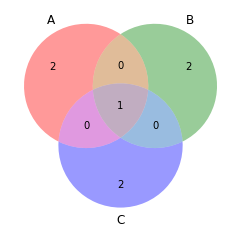

In [6]:
venn3(({'A', 'B', 'C'}, {'A', 'D', 'E'}, {'A', "F", "G"}))

$$(3+3+3)-(1+1+1)+1=9-3+1=7$$

### Problem 9
A fair dice is rolled $n$ times. What is the probability that at least 1 of the 6 values never appears?

### Solution

$A_i$ - the event that $i$-th value does not appear. Then, $\bigcup\limits_{i=1}^6 A_i$ is the event that at least one values does not appear.

